# Analiza zmian wartości cząsteczek PM10 miast Pomorza Zachodniego dla lat 2010 i 2020

Spis treści:
1. wstęp
2. przygotowanie danych
3. podstawowe informacje o wartościach PM10
3. analiza PM10 dla poszczególnych lat
4. analiza PM10 dla poszczególnych miast
5. analiza zmian PM10 na przestrzeni lat
6. podsumowanie

## 1. wstęp

Celem pracy jest obserwacja potencjalnych zmian zawartości cząsteczek PM10 w powietrzu w ujęciu czasowym. W ramach pracy, wybrany został obszar Pomorza Zachodniego. Do dokładniejszej analizy przygotowane dane dla miast Szczecin, Szczecinek oraz Koszalin. Jako zakres czasowy wybrane zostały dwa lata, których wartości zostały poddane dalszej analizie: 2010, 2020. DOPOPRAWY Wartości zostały zapisane w jednostsce mikrogramów na metr sześcienny µg/m3

## 2. przygotowywanie danych

Do poprawnego przygotowania danych dla dalszej analizy, wykorzystane zostały biblioteki pandas oras numpy. Do wizualizacji danych wykorzystano bibliotekę PollutionPlotter. Dla formatowania ramek danych jako tabele, posłużono się pakietem IPython.

In [5]:
import pandas as pd
import numpy as np
from pyPollution.main import PollutionPlotter
from IPython.display import display

ModuleNotFoundError: No module named 'pandas'

załadowanie danych, one wczesniej byly poprawione ze usunieto naglowki recznie i dziwne teksty, zaladowanie dwoch lat

In [11]:
zp2010 = pd.read_csv("data/zachpom_2010_pm10.csv", sep=";")
zp2020 = pd.read_csv("data/zachpom_2020_pm10.csv", sep=";")

w ramach projektu dane zostaly zagregowane do miesiecy dla obydwu lat

In [12]:
zp2010['Month'] = pd.to_datetime(zp2010['Date'])
zp2010MeanMonth = zp2010.groupby(zp2010['Month'].dt.strftime('%B')).mean()
zp2010MeanMonth['month_order'] = [4, 8, 12, 2, 1, 7, 6, 3, 5, 11, 10, 9]
zp2010MeanMonth.reset_index(inplace=True)
zp2010MeanMonth.set_index('month_order', inplace=True)
zp2010MeanMonth.sort_index(inplace=True)

In [13]:
zp2020['Month'] = pd.to_datetime(zp2020['Date'])
zp2020MeanMonth = zp2020.groupby(zp2020['Month'].dt.strftime('%B')).mean()
zp2020MeanMonth['month_order'] = [4, 8, 12, 2, 1, 7, 6, 3, 5, 11, 10, 9]
zp2020MeanMonth.reset_index(inplace=True)
zp2020MeanMonth.set_index('month_order', inplace=True)
zp2020MeanMonth.sort_index(inplace=True)

obliczenie średnich wartości pm10 dla poszczególnych miast i lat

In [14]:
city_names = ['Szczecin', 'Koszalin', 'Szczecinek']
mean_pm10_10 = zp2010[city_names].mean().mean()
mean_pm10_20 = zp2020[city_names].mean().mean()

## 3. podstawowe informacje o wartościach PM10

In [15]:
display(zp2010.describe())
display(zp2020.describe())


,Koszalin,Szczecinek,Szczecin
count,365.000000,365.000000,361.000000
mean,24.964932,34.755890,32.868421
std,16.581392,22.185794,19.766838
min,3.300000,6.600000,7.000000
25%,14.700000,19.700000,19.000000
50%,19.900000,28.500000,26.800000
75%,30.500000,42.100000,39.900000
max,151.100000,156.100000,148.600000


,Szczecinek,Szczecin,Koszalin
count,366.000000,366.000000,346.000000
mean,18.818852,24.160109,15.279480
std,10.544624,10.964333,7.207457
min,4.200000,6.000000,2.700000
25%,11.600000,16.950000,10.600000
50%,15.900000,21.800000,13.700000
75%,23.350000,29.150000,18.350000
max,70.400000,77.300000,52.400000


## 5. analiza zmian PM10 na przestrzeni lat

In [7]:
xlabel = ['Koszalin', 'Szczecin', 'Szczecinek']
mean2010 = [zp2010.Koszalin.mean(), zp2010.Szczecin.mean(), zp2010.Szczecinek.mean()]
mean2020 = [zp2020.Koszalin.mean(), zp2020.Szczecin.mean(), zp2020.Szczecinek.mean()]

x_axis = np.arange(len(xlabel))

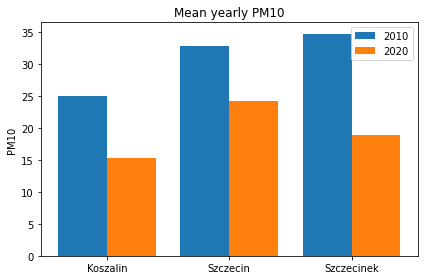

In [9]:
meanplots = PollutionPlotter()
meanplots.bar(x_axis - 0.2,  mean2010, width=0.4, ticks=x_axis, xlabel=xlabel, label="2010")
meanplots.bar(x_axis + 0.2,  mean2020, width=0.4, ticks=x_axis, xlabel=xlabel, label="2020")

meanplots.ylabel = "PM10"
meanplots.xticks = 0
meanplots.format(title="Mean yearly PM10", add_grid=False)

meanplots.print()

## 3. analiza PM10 dla poszczególnych lat

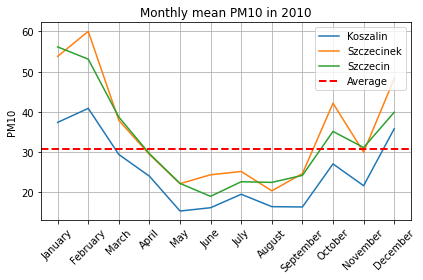

In [8]:
plot2010 = PollutionPlotter()
plot2010.plot(x=zp2010MeanMonth.Month,
              y=zp2010MeanMonth.Koszalin, label="Koszalin")
plot2010.plot(zp2010MeanMonth.Month,
              zp2010MeanMonth.Szczecinek, label="Szczecinek")
plot2010.plot(zp2010MeanMonth.Month,
              zp2010MeanMonth.Szczecin, label="Szczecin")
plot2010.ylabel = 'PM10'
plot2010.avgline = mean_pm10_10
plot2010.format('Monthly mean PM10 in 2010', add_avgline=True)
plot2010.print()

In [6]:
plot2020 = PollutionPlotter()
plot2020.plot(x=zp2020MeanMonth.Month,
              y=zp2020MeanMonth.Koszalin, label="Koszalin")
plot2020.plot(zp2020MeanMonth.Month,
              zp2020MeanMonth.Szczecinek, label="Szczecinek")
plot2020.plot(zp2020MeanMonth.Month,
              zp2020MeanMonth.Szczecin, label="Szczecin")
plot2020.ylabel = 'Mean monthly PM10'
plot2020.avgline = mean_pm10_20
plot2020.format('Monthly PM10 in 2020', add_avgline = True)
plot2020.print()

NameError: name 'PollutionPlotter' is not defined

## 4. analiza PM10 dla poszczególnych miast

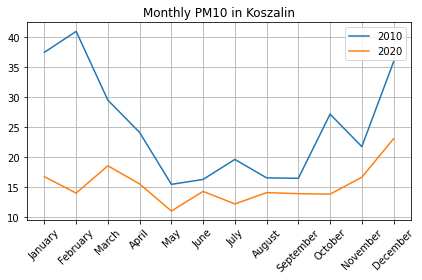

In [13]:
plotKoszalin = PollutionPlotter()
plotKoszalin.plot(zp2010MeanMonth.Month,
              zp2010MeanMonth.Koszalin, label="2010")
plotKoszalin.plot(zp2020MeanMonth.Month,
              zp2020MeanMonth.Koszalin, label="2020")
plotKoszalin.format('Monthly PM10 in Koszalin')
plotKoszalin.print()

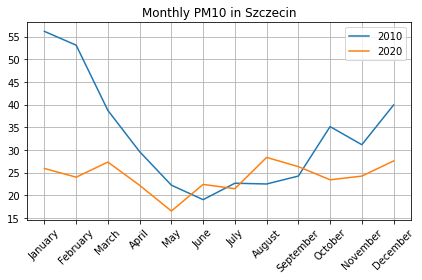

In [12]:
plotSzczecin = PollutionPlotter()
plotSzczecin.plot(zp2010MeanMonth.Month,
              zp2010MeanMonth.Szczecin, label="2010")
plotSzczecin.plot(zp2020MeanMonth.Month,
              zp2020MeanMonth.Szczecin, label="2020")
plotSzczecin.format('Monthly PM10 in Szczecin')
plotSzczecin.print()

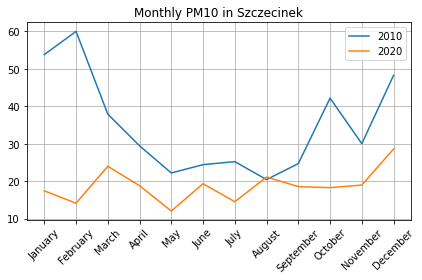

In [9]:
plotSzczecinek = PollutionPlotter()
plotSzczecinek.plot(zp2010MeanMonth.Month,
              zp2010MeanMonth.Szczecinek, label="2010")
plotSzczecinek.plot(zp2020MeanMonth.Month,
              zp2020MeanMonth.Szczecinek, label="2020")
plotSzczecinek.format('Monthly PM10 in Szczecinek')
plotSzczecinek.print()

## 7. podsumowanie